# Задача 42. Момент инерции
## Условие

Требуется определить внешний $R$ и внутренний $r$ радиусы цилиндрической трубы, если известны ее длина $\ell$, толщина $h=R-r$, плотность $\rho$ и момент инерции относительно ее продольной оси $I$. 

Момент инерции для цилиндрической трубы вычисляется по формуле
$$
I = \frac{\pi\rho \ell}{2} (R^4 - r^4)
$$
и задача сводится к решению кубического уравнения.

1. Выведите это кубическое уравнение

2. Решите его численно (см. `scipy.optimize.brentq` или другой метод) для значений:
   $\ell = 2$, $h=0.02$, $\rho = 1200$, $I = 1.2$. Сколько вещественных корней имеет уравнение?

3. Построить график зависимости $r$ от $I$ при значениях $\ell$, $h$, $\rho$, указанных выше.


## Решение
### Подключение библиотек


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
%matplotlib inline

Из $h=R-r$ выводим, что $R=h+r$

Подставляем в данную выше формулу и получаем уравнение с одной неизвестной. Использую бином Ньютона:
$$
I = \frac{\pi\rho \ell}{2} (h^4 + 4 h^3 r + 6 h^2 r^2 + 4 h r^3 + r^4 - r^4) = \frac{\pi\rho \ell}{2} (h^4 + 4 h^3 r + 6 h^2 r^2 + 4 h r^3)
$$

Таким образом, мы вывели кубическое уравнение.


### Численное решение
Мы имеем константы: $ℓ=2$, $ℎ=0.02$, $𝜌=1200$, $𝐼=1.2$


In [3]:
l = 2
h = 0.02
p = 1200
I = 1.2



Возьмем уравнение $\frac{\pi\rho \ell}{2} (h^4 + 4 h^3 r + 6 h^2 r^2 + 4 h r^3) - I = 0$

Напишем функцию для этого уравнения:

In [4]:
def func(r):
    return ((np.pi * p * l / 2) * (h ** 4 + 4 * h ** 3 * r + 6 * h * h * r * r + 4 * h * r ** 3) - I)

С помощью метода Брента, который сочетает в себе методы деления пополам, секущих и обратной квадратичной интерполяции, найдем корни - решим уравнение численно:

In [5]:
answer = brentq(func,0,100)
answer

0.14824978647451797

In [44]:
R = h + answer
R

0.16824978647451796

Построим график уравнения для определения количества корней:

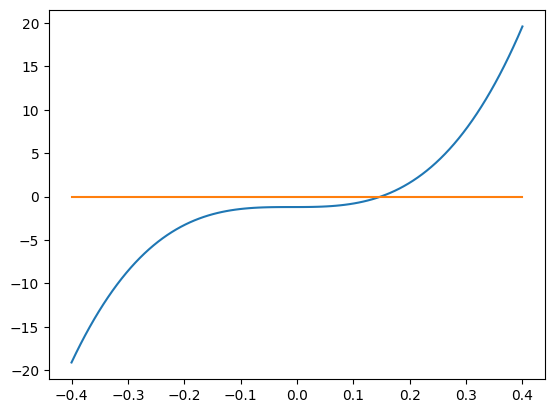

In [6]:
r = np.linspace(-0.4,0.4,100)
rr = np.linspace(-0.4,0.4,100)
plt.plot(r,((np.pi * p * l / 2) * (h ** 4 + 4 * h ** 3 * r + 6 * h * h * r * r + 4 * h * r ** 3)) - I)
plt.plot(rr,rr * 0)
pass

Как мы видим, есть только одно пересечение - только один корень, который мы и вычислили выше
### График зависимости $r$ от $I$


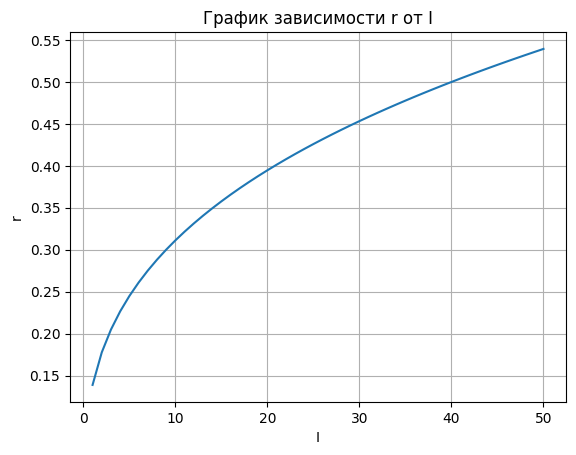

In [42]:
I = 0
IArray = np.linspace(1,50,50)
rArray = []
for i in range(50):
    I = IArray[i]
    rArray.append(brentq(func,0,100))

plt.title('График зависимости r от I')
plt.xlabel('I')
plt.ylabel('r')
plt.grid()
plt.plot(IArray,rArray)
pass

## Вывод
Определил внешний $𝑅$ и внутренний $𝑟$ радиусы цилиндрической трубы, при известных: длина $ℓ$, толщина  $ℎ=𝑅−𝑟$, плотность $𝜌$ и момент инерции относительно ее продольной оси $𝐼$ с помощью выведенного мной кубического уравнения.

$r$ = 0.14824978647451797

$R$ = 0.16824978647451796

Метод Брента - эффективный и надежный метод для решения нелинейных уравнений

График зависимости $r$ от $I$ напоминает функцию корня


Создал массив из I со значениями I от 1 до 50, создал массив с r(которые получаю из brentq), которые имеют позиции в соответствии с позициями из массива I. Построил на основании их график.